In [5]:
import pandas as pd
import numpy as np

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [10]:
df = pd.read_csv('labeled_data_with_metrics.csv')
df = df.drop(columns=['Unnamed: 0'])

In [11]:
df.columns

Index(['distinct_id', 'locationSetting', 'notificationSettings',
       'active_timespan', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown',
       'num_sessions', 'sessions_per_day', 'America/New_York',
       'America/Los_Angeles', 'America/Chicago', 'Asia/Kolkata',
       'America/Denver', 'other_timezone', 'commentAdded', 'commentLength',
       'churned', 'number_ratings', 'SQS', 'avg_session_duration',
       'time_delta_slope', 'session_time_slope', 'time_delta_slope_90',
       'session_time_slope_90'],
      dtype='object')

In [12]:
feature_cols = ['SQS', 'avg_session_duration', 'time_delta_slope', 'session_time_slope',
                'other_timezone', 'US', 'Unknown']
feature_cols = ['SQS', 'avg_session_duration', 'Unknown', 'time_delta_slope', 'US', 'session_time_slope']
X = df[feature_cols] # Features
y = df.churned # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8434180138568129


In [16]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('churn.png')
#Image(graph.create_png())

/Users/graceqiu/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[874 191]
 [148 952]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1065
           1       0.83      0.87      0.85      1100

    accuracy                           0.84      2165
   macro avg       0.84      0.84      0.84      2165
weighted avg       0.84      0.84      0.84      2165



# Random Forest Classifier

In [18]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8678983833718245


In [20]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
feature_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
feature_imp

Unknown                 0.245584
avg_session_duration    0.215898
SQS                     0.210166
time_delta_slope        0.161019
session_time_slope      0.105034
US                      0.062299
dtype: float64

No handles with labels found to put in legend.


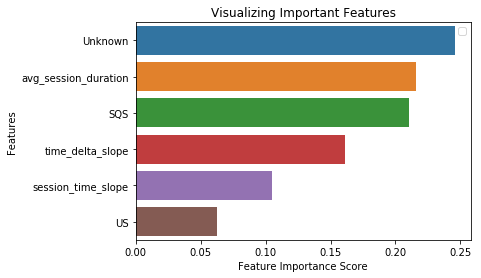

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [23]:
for i in range(5,35):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy at", i, "max depth:",metrics.accuracy_score(y_test, y_pred))

Accuracy at 5 max depth: 0.846189376443418
Accuracy at 6 max depth: 0.8457274826789838
Accuracy at 7 max depth: 0.8531177829099307
Accuracy at 8 max depth: 0.8632794457274827
Accuracy at 9 max depth: 0.859122401847575
Accuracy at 10 max depth: 0.859122401847575
Accuracy at 11 max depth: 0.8577367205542725
Accuracy at 12 max depth: 0.8517321016166282
Accuracy at 13 max depth: 0.8517321016166282
Accuracy at 14 max depth: 0.8480369515011548
Accuracy at 15 max depth: 0.8337182448036952
Accuracy at 16 max depth: 0.8406466512702079
Accuracy at 17 max depth: 0.8374133949191686
Accuracy at 18 max depth: 0.8397228637413395
Accuracy at 19 max depth: 0.8364896073903002
Accuracy at 20 max depth: 0.8341801385681293
Accuracy at 21 max depth: 0.8337182448036952
Accuracy at 22 max depth: 0.8346420323325635
Accuracy at 23 max depth: 0.8323325635103926
Accuracy at 24 max depth: 0.8309468822170901
Accuracy at 25 max depth: 0.8304849884526558
Accuracy at 26 max depth: 0.8309468822170901
Accuracy at 27 max

# XGBoost

In [101]:
data = df.drop(columns=['distinct_id'])
data = data[['SQS', 'avg_session_duration', 'Unknown', 'time_delta_slope', 'US', 'session_time_slope', 'churned']]

In [102]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [103]:
X, y = data.loc[:, data.columns != 'churned'], data.iloc[:, data.columns == 'churned']

In [104]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [131]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 7, alpha = 10, n_estimators = 400)

xg_reg = xgb.XGBClassifier(
    learning_rate = .01,
    objective='binary:logistic', 
    max_depth=10,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.7,
    booster='gbtree', 
    n_estimators=400, 
    scale_pos_weight=1,
    reg_alpha=.1,
    nthread=4,
    seed=1)

In [132]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/Users/graceqiu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/graceqiu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.373220


In [130]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

[19:45:53] WARNING: /private/var/folders/0j/m0kkk0mj1dqdhkvv6t7mcvxc0000gn/T/pip-install-3_dk21sj/xgboost/xgboost/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:53] WARNING: /private/var/folders/0j/m0kkk0mj1dqdhkvv6t7mcvxc0000gn/T/pip-install-3_dk21sj/xgboost/xgboost/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:53] WARNING: /private/var/folders/0j/m0kkk0mj1dqdhkvv6t7mcvxc0000gn/T/pip-install-3_dk21sj/xgboost/xgboost/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.499107,0.000071,0.499268,0.000033
1,0.494065,0.002108,0.494192,0.001894
2,0.492245,0.002857,0.492282,0.002837
3,0.487283,0.002650,0.487919,0.002283
4,0.485384,0.003510,0.485978,0.003260


In [110]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.410453
Name: test-rmse-mean, dtype: float64


In [111]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[19:42:04] WARNING: /private/var/folders/0j/m0kkk0mj1dqdhkvv6t7mcvxc0000gn/T/pip-install-3_dk21sj/xgboost/xgboost/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [139]:
predictions = xg_reg.predict(X_train)

In [151]:
from sklearn.metrics import accuracy_score

In [152]:
y_pred = xg_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [153]:
accuracy

0.8607068607068608

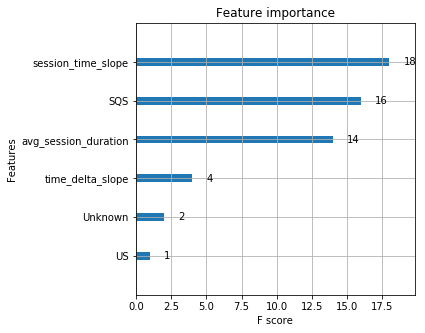

In [113]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()